María Garrido Gómez NIA: 100363904


**REGRESIÓN**

En estimación conocemos los valores x relacionados con s, donde la s no la conocemos. En regresión, además de conocer x (que conocemos siempre), conocemos también s (que es el resultado), y lo que queremos es saber cuanto afectan las x para s.

Para la regresión se utilizan mínimos cuadrados, que es la mínima distancia posible (mejor ajuste posible) para un sistema que no se puede resolver.

Outliers: muestras que se comportan muy distintas al resto que empeoran el modelo. Lo que se suele hacer es cargárselas directamente, ignorarlas.

**IMPORTANCIA DE LAS VARIABLES**

- Variables esenciales: Cuando se elimina una de estas variables, el rendimiento comienza a empeorar significativamente.
- Variables ruidosas: la eliminación de estas variables mejora el rendimiento.
- Variables redundantes: Estas variables se pueden eliminar sin afectar el rendimiento, ya que con alta probabilidad la información que llevan también está presente en otras variables.

**RIDGE**

La regularización mejora el condicionamiento del problema y reduce la varianza de las estimaciones. Los valores más grandes especifican una regularización más fuerte.
Por tanto, Ridge consiste en introducir de manera deliberada una desviación en el modelo (un sesgo) de modo que podamos decrementar la varianza.

En una regresión de tipo lineal, la importancia de cada variable viene determinada por el valor del peso que le corresponde. A mayor valor del peso (en valor absoluto), más relevante es la variable. Si el peso es positivo, significa que para valores mayores de la variable, los de la estimación serán también mayores. Lo contrario sucede para pesos negativos.

**KERNEL RIDGE REGRESSION**

Kernel es un método para resolver un caso no lineal utilizando un estimador lineal, es decir, se resuelve mediante regresión semilineal.

Para resolver este tipo de casos, se transforman las x.

**ÁRBOLES DE DECISIÓN**

En un árbol de decisión, las variables más importantes son las que se utilizarán al principio. Puede suceder, incluso, que se utilice la misma variable en varios nodos para seguir avanzando, si es muy importante. Las variables ruidosas no llegarán, probablemente, a ser usadas nunca.

**RANDOM FOREST**

Para RF, las variables que sean elegidas más habitualmente para formar parte de los árboles tendrán mayor relevancia.
Además, como RF utiliza subconjuntos de los datos para entrenar, si se emplean los datos no utilizados en cada árbol como conjunto de test, veríamos que aquellos árboles que obtienen mejores puntuaciones son los que incluyen a las variables más relevantes.

In [ ]:
from IPython.core.display import Image, display

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal, norm


# Modern Theory of Detection and Estimation
### Fall 2020

&nbsp;
&nbsp;
&nbsp;
# Lab 2. Machine Learning for Regression

&nbsp;
&nbsp;
&nbsp;

Dept. of Signal Processing and Communications



# Diabetes dataset

[Diabetes](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset) is another classic benchmark for regression. Each observation corresponds to a diabetes patient represented by 10 variables and the corresponding target is a score that measures  the disease progression one year after baseline.

The variables that form each observation are:
- age in years

- sex

- bmi body mass index

- bp average blood pressure

- six measures taken from the blood of the patient:
  - s1 tc, T-Cells (a type of white blood cells)

  - s2 ldl, low-density lipoproteins

  - s3 hdl, high-density lipoproteins

  - s4 tch, thyroid stimulating hormone

  - s5 ltg, lamotrigine

  - s6 glu, blood sugar level

The dataset is available in sklearn through [load_diabetes](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes). Take a moment to read the documentation...

Next cell loads the data for you and create the train and test partitions (80-20%, respectively) that we are going to use along this notebook.


In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

data = load_diabetes()
feature_names = data['feature_names'] #list with feature names

X = data['data']
Y = data['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("{0:d} train observations with {1:d} columns".format(X_train.shape[0], X_train.shape[1]))
print("{0:d} train targets".format(len(X_train)))

print("{0:d} test observations with {1:d} columns".format(X_test.shape[0], X_test.shape[1]))
print("{0:d} test targets".format(len(X_test)))

353 train observations with 10 columns
353 train targets
89 test observations with 10 columns
89 test targets


Once the data set is loaded, analyze the observation matrix X (calculate the mean and standard deviation of your variables) and justify the need or not to normalize the data. If you consider that normalization is necessary, normalize the data in the next cell.

In [ ]:

#Sin normalizar
print("Mean of X_train")
print(np.mean(X_train,0))
print("")
print("Mean of X_test")
print(np.mean(X_test,0))
print("")
print("Standar desviation of X_train")
print(np.std(X_train,0))
print("")
print("Standar desviation of X_test")
print(np.std(X_test,0))
print("")

print("As we can see, it isn't necessary to normalize")



Mean of X_train
[ 0.00144181  0.00018389  0.00173566  0.00117937 -0.00055551 -0.00080601
 -0.000989    0.00037655  0.001216    0.00189101]

Mean of X_test
[-0.00571863 -0.00072937 -0.00688413 -0.00467772  0.00220332  0.00319687
  0.00392268 -0.00149352 -0.00482303 -0.00750029]

Standar desviation of X_train
[0.04626839 0.04757647 0.04720827 0.04840005 0.04771808 0.04756369
 0.04697698 0.04772223 0.0477604  0.04831173]

Standar desviation of X_test
[0.05200108 0.04751323 0.04834517 0.04378653 0.04688892 0.04743625
 0.04963596 0.04690719 0.04647035 0.0436818 ]

As we can see, it isn't necessary to normalize


# 1. Evaluation of regression methods



The methods you will explore to solve this task are:
- [Regularized linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) 
- [Kernel ridge regression with an RBF kernel](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html)
- [Random Forests for regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
- [$k$NN for regression](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor



### Measure performance: $R^2$ score 

In sklearn regression the *score* by default is the  $R^2$ statistic.
$$
R^2 = 1-\frac{\sum_{i=1}^{N_t}{(y_i-\hat{y}_i)^2}}{\sum_{i=1}^{N_t}{(y_i-\bar{y})^2}}
$$where $N_t$ is the length of the evaluation set, $\hat{y}_i$, $i=1,\dots,N_t$ are the estimations made by the model, $y_i$ ($i=1,\dots,N_t$)  are the true targets of the evaluation set and $\bar{y}=1/N_t\sum_{i=1}^{N_t}y_i$ is its average.

**$R^2$ interpretation**

$R^2$ takes a maximum value of $1.0$ when the model makes an exact  (0 error) estimation of all the targets. The value of $R^2$ decreases as the estimation errors increase. 

The decrease in $R^2$ value is determined by the comparison between the accuracy of the model in the test set and that of a trivial model that would output as estimation for all the targets their mean value. 

If the model is not perfect ($R^2=0$) but better than the trivial one, then $0 < R^2 < 1$. If $R^2$ falls below 0 and takes negative values, it means that the estimations output by the model are worse than using the mean (trivial estimation). 

 

## 1.1. Selection of hyperparameters for all the regression methods under study

The first task is to obtain a reasonable set of hyperparameters for all the methods. In this assignment the corresponding ranges will be:
- Linear Ridge Regression:
  - `alpha`: 0.0001, 0.001, 0.01, 0.1, 1
- Kernel Ridge Regression:
  - `alpha`: 0.0001, 0.001, 0.01, 0.1, 1
  - `gamma` for the RBF kernel: 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1
- Random Forests:
  - number of estimators: 10, 20, 50, 100, 200, 500, 1000
  - maximum number of leaves per tree: 5, 10, 20, 50
- $k$NN:
  - $k$: 1,2,3,5,7,10,15,20,40, 80
  - weight: uniform and distance


*Note*: In class the ridge regressor model had a regularization parameter called $\lambda$. As $\lambda$ is a reserved word in Python, sklearn has called this parameter as `alpha`.


### 1.1.1 Program the grid exploration
The next cell contains the skeleton of the code to construct a GridSearch and performs its exploration with a 10 fold cross validation.

Complete the missing lines.

In [ ]:
def my_grid(model, parameters, X_train, Y_train, X_test, Y_test):

  grid = GridSearchCV(model, parameters, cv=10)
  grid.fit(X_train, Y_train) #ajustamos los datos
  r2_value = grid.score(X_test, Y_test)
  
  
  return grid, r2_value


### 1.1.2 Crossvalidate the model parameters 

Now use the function above to find hyperparameters for Random Forest, kNN, ridge regression and kernel ridge regression. Return the values od the selected parameters for each model.

Hint: remember the grid can store a best estimator


### K-NN

In [ ]:
#hiperparámetros de knn: n_neighbors (número de vecinos) y weights (pesos)
knn_params = {'n_neighbors' :[1, 3, 5, 7, 10, 15, 20, 40, 80], 'weights' : ['uniform','distance']}
knn, r2_value_knn = my_grid(KNeighborsRegressor(), knn_params, X_train, Y_train, X_test, Y_test)

knn_best_params = knn.best_params_

print("Best Parameters for K-NN:")
print(knn_best_params)

print("R2 value for K-NN:")
print(r2_value_knn)


Best Parameters for K-NN:
{'n_neighbors': 20, 'weights': 'distance'}
R2 value for K-NN:
0.43452846638964693


### Random Forest

In [ ]:
#hiperparámetros de random forest: n_estimators (número de árboles en el bosque) y max_leaf_nodes (máximo número de nodos hoja)
rf_params = {'n_estimators': [10,20,50,100,200,500,1000], 'max_leaf_nodes' : [5,10,20,50]}
rf, r2_value_rf = my_grid(RandomForestRegressor(), rf_params, X_train, Y_train, X_test, Y_test)

rf_best_params = rf.best_params_

print("Best Parameters for Random Forest:")
print(rf_best_params)

print("R2 value for Random Forest:")
print(r2_value_rf)


Best Parameters for Random Forest:
{'max_leaf_nodes': 10, 'n_estimators': 200}
R2 value for Random Forest:
0.4826763291589245


### Ridge Regression

In [ ]:
#hiperparámetros de Ridge Regression: alpha (fuerza de regularización)
ridge_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
ridge, r2_value_ridge = my_grid(Ridge(), ridge_params, X_train, Y_train, X_test, Y_test)

ridge_best_params = ridge.best_params_

print("Best Parameters for Ridge Regression:")
print(ridge_best_params)

print("R2 value for Ridge Regression:")
print(r2_value_ridge)



Best Parameters for Ridge Regression:
{'alpha': 0.1}
R2 value for Ridge Regression:
0.4608531678297328


### Kernel Ridge Regression

In [ ]:
#hiperparámetros de Kernel Ridge Regression: alpha (fuerza de regularización), kernel (núcleo), gamma (coeficiente de kernel para RBF)
kr_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1], 'kernel':['rbf'], 'gamma': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]}
#RBF -> función de base radial

kr, r2_value_kr = my_grid(KernelRidge(), kr_params, X_train, Y_train, X_test, Y_test)

kr_best_params = kr.best_params_

print("Best Parameters Kernel Ridge Regression:")
print(kr_best_params)

print("R2 value for Kernel Ridge Regression:")
print(r2_value_kr)

#Si R2 cae por debajo de 0 y toma valores negativos,
#significa que las estimaciones producidas por el modelo son peores que usar la media (estimación trivial).


Best Parameters Kernel Ridge Regression:
{'alpha': 0.01, 'gamma': 0.05, 'kernel': 'rbf'}
R2 value for Kernel Ridge Regression:
0.4613522704926605


### 1.1.3 Discussion

Analyze which method is better than the others in terms of $R^2$ score.

El mejor método en términos de R2 es Random Forest, ya que tiene el mayor score de todos los métodos.

## 1.2. Measures of training and evaluation time





### 1.2.1. Compute time and test times

Use [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate) to obtain estimations of the **time needed to train each method** and the **time needed to evaluate a test set**. Select 10 folds to express the measures with mean and standard deviations.  **Use the best set of hyperparameters in terms of $R^2$ found in the previous cell**. 

In [ ]:
from sklearn.model_selection import  cross_validate

#K-NN
scores_knn = cross_validate(knn.best_estimator_, X_train, Y_train, cv=10)
time_to_train_mean_knn = np.mean(scores_knn['fit_time']) #tiempo de ajuste para cada validación de la media
time_to_train_std_knn = np.std(scores_knn['fit_time']) #tiempo de ajuste para cada validación de la desviación típica
time_to_test_mean_knn = np.mean(scores_knn['score_time']) #tiempo de evaluación para cada validación de la media
time_to_test_std_knn = np.std(scores_knn['score_time']) #tiempo de evaluación para cada validación de la desviación típica

#Random Forest
scores_rf = cross_validate(rf.best_estimator_, X_train, Y_train, cv=10)
time_to_train_mean_rf = np.mean(scores_rf['fit_time'])
time_to_train_std_rf = np.std(scores_rf['fit_time'])
time_to_test_mean_rf = np.mean(scores_rf['score_time'])
time_to_test_std_rf = np.std(scores_rf['score_time'])

#Ridge Regression
scores_ridge = cross_validate(ridge.best_estimator_, X_train, Y_train, cv=10)
time_to_train_mean_ridge = np.mean(scores_ridge['fit_time'])
time_to_train_std_ridge = np.std(scores_ridge['fit_time'])
time_to_test_mean_ridge = np.mean(scores_ridge['score_time'])
time_to_test_std_ridge = np.std(scores_ridge['score_time']) 

#Kernel Ridge Regression
scores_kr = cross_validate(kr.best_estimator_, X_train, Y_train, cv=10)
time_to_train_mean_kr = np.mean(scores_kr['fit_time'])
time_to_train_std_kr = np.std(scores_kr['fit_time'])
time_to_test_mean_kr = np.mean(scores_kr['score_time'])
time_to_test_std_kr = np.std(scores_kr['score_time']) 


print("For K-NN:")
print("time to fit kNN {0:.3f} +/- {1:.3f} seconds".format(time_to_train_mean_knn, time_to_train_std_knn))
print("time to test kNN {0:.3f} +/- {1:.3f} seconds\n".format(time_to_test_mean_knn, time_to_test_std_knn))

print("For Random Forest:")
print("time to fit Random Forest {0:.3f} +/- {1:.3f} seconds".format(time_to_train_mean_rf, time_to_train_std_rf))
print("time to test Random Forest {0:.3f} +/- {1:.3f} seconds\n".format(time_to_test_mean_rf, time_to_test_std_rf))

print("For Ridge Regression:")
print("time to fit Ridge Regression {0:.3f} +/- {1:.3f} seconds".format(time_to_train_mean_ridge, time_to_train_std_ridge))
print("time to test Ridge Regression {0:.3f} +/- {1:.3f} seconds\n".format(time_to_test_mean_ridge, time_to_test_std_ridge))

print("For Kernel Ridge Regression:")
print("time to fit Kernel Ridge Regression {0:.3f} +/- {1:.3f} seconds".format(time_to_train_mean_kr, time_to_train_std_kr))
print("time to test Kernel Ridge Regression {0:.3f} +/- {1:.3f} seconds\n".format(time_to_test_mean_kr, time_to_test_std_kr))



For K-NN:
time to fit kNN 0.001 +/- 0.000 seconds
time to test kNN 0.002 +/- 0.000 seconds

For Random Forest:
time to fit Random Forest 0.326 +/- 0.007 seconds
time to test Random Forest 0.011 +/- 0.000 seconds

For Ridge Regression:
time to fit Ridge Regression 0.001 +/- 0.000 seconds
time to test Ridge Regression 0.000 +/- 0.000 seconds

For Kernel Ridge Regression:
time to fit Kernel Ridge Regression 0.008 +/- 0.000 seconds
time to test Kernel Ridge Regression 0.002 +/- 0.000 seconds



### 1.2.2. Visual representation
Produce a (1,2) subplot with the following information:
- left panel: scatter plot of the performance of the 5 methods. The x axis is the **time to fit** and the y axis is the $R^2$. Each method should have a single marker with a different color. Use the legend to identify methods

- right panel: The x axis is the **time to score** and the y axis is the $R^2$. Each method should have a single marker with a different color. Use the legend to identify methods

Text(0.5, 1.0, 'Right panel')

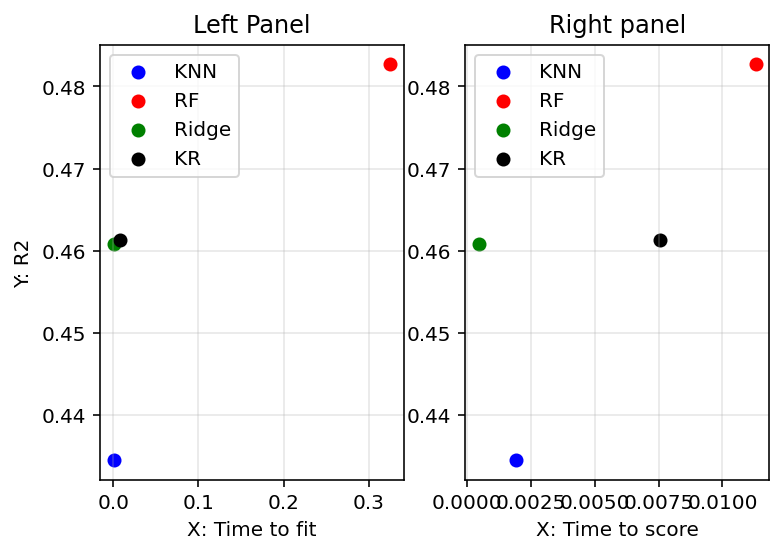

In [ ]:
ff,aa = plt.subplots(1,2)

#Left Panel
aa[0].scatter(time_to_train_mean_knn, r2_value_knn, color='blue', label ='KNN')
aa[0].scatter(time_to_train_mean_rf, r2_value_rf, color='red', label = 'RF')
aa[0].scatter(time_to_train_mean_ridge, r2_value_ridge, color='green', label='Ridge')
aa[0].scatter(time_to_train_mean_kr, r2_value_kr, color='black', label='KR')
aa[0].legend()
aa[0].grid(alpha=0.3)
aa[0].set_xlabel('X: Time to fit')
aa[0].set_ylabel('Y: R2')
aa[0].set_title('Left Panel')

#Right Panel
aa[1].scatter(time_to_test_mean_knn, r2_value_knn, color='blue', label='KNN')
aa[1].scatter(time_to_test_mean_rf, r2_value_rf, color='red', label='RF')
aa[1].scatter(time_to_test_mean_ridge, r2_value_ridge, color='green', label='Ridge')
aa[1].scatter(time_to_train_mean_kr, r2_value_kr, color='black', label = 'KR')
aa[1].legend()
aa[1].grid(alpha=0.3)
aa[1].set_xlabel('X: Time to score')
aa[1].set_title('Right panel')


### 1.2.3. Discussion

Use the plots to describe the advantages and disadvantages of each method

*Según vemos en las gráficas, K-NN tiene menor tiempo de train y de test pero tiene menor score, al contrario que Random Forest, que tiene mayor tiempo de train y de test pero es el método que tiene mayor score.*

# 2. Feature selection

The goal in this assignment is to learn how to use machine learning for improving our domain learning about a problem. In this case the problem is to study the dependence of the progress of diabetes with the variables that characterize each patient. You want to learn:
- if any of the variables is noisy (its presence worsens the performance of the regressors)
- if any of the variables is not relevant (its presence or absence does not affect the performance of the regressor, hence you could save resources by skipping its measure)
- if some of these variables are more critical than the others in the conformation of the score. This way you can gain insights about the main drivers of the disease.

Next sections propose you several approaches to carry out this feature selection.


## 2.1. Univariate Feature Selection


### 2.1.1. Univariate Feature Selection with linear regression

As there are 10 input variables, one can solve 10 1D problems and see what is the best variable if we had to stick to a model with a single variable. 

- Construct the 10 linear models (using a linear ridge regressor)
- Crossvalidate, with a 10 fold CV, their `alpha` parameters in the range `alpha`: 0.001, 0.01, 0.1, 1
- Plot $5\times 2$ the model with scatters, print in the title the $R^2$

Which variable is more critical to predict the disease progression?

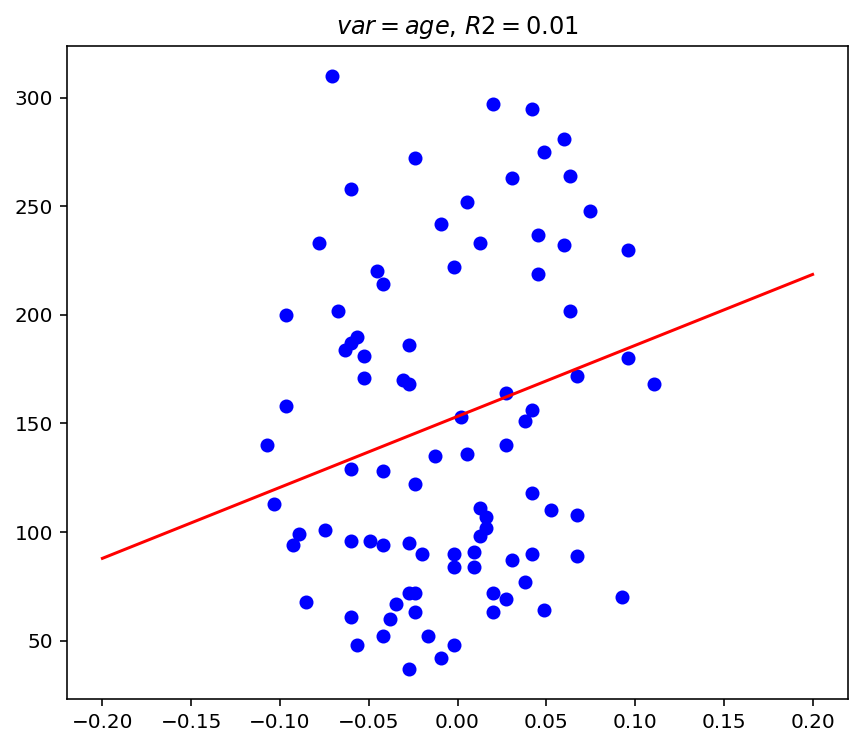

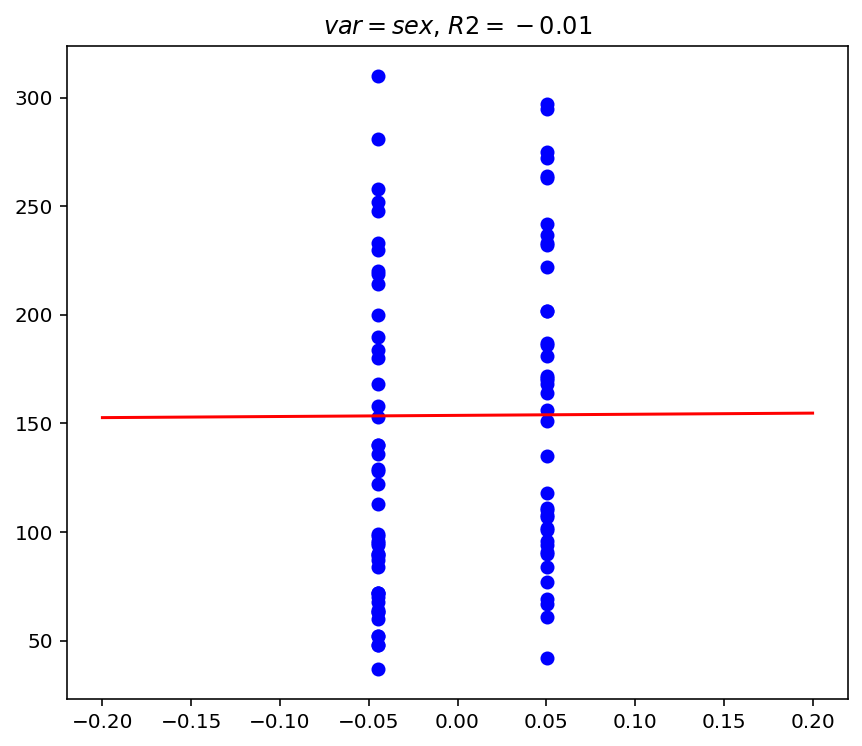

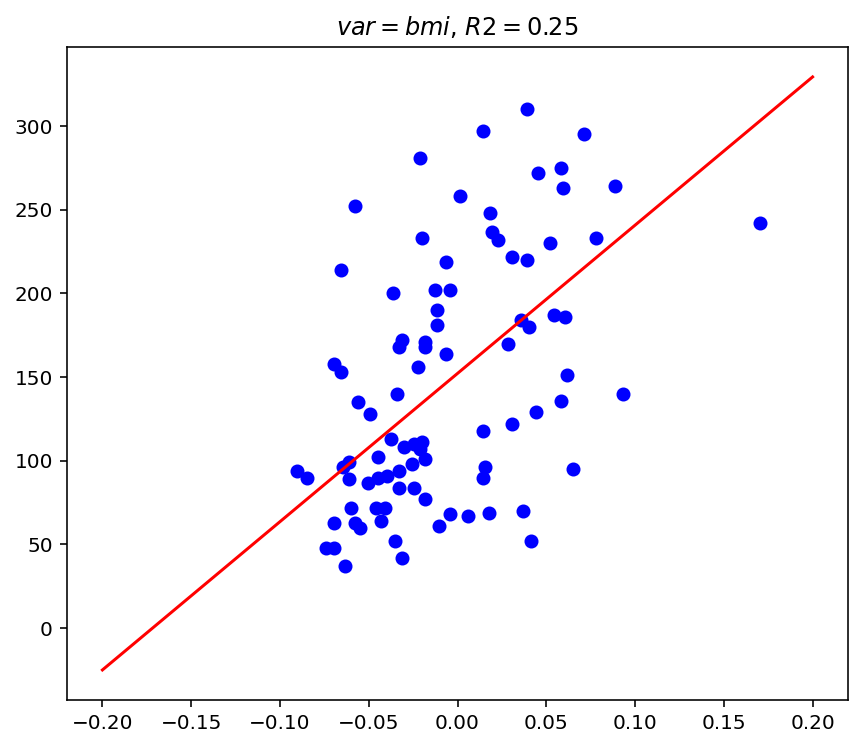

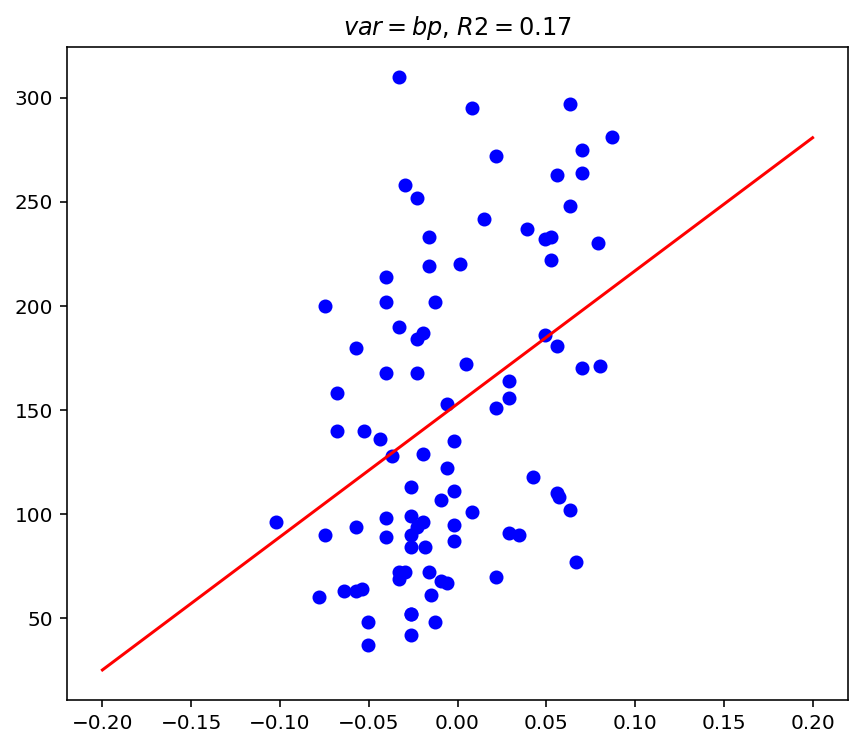

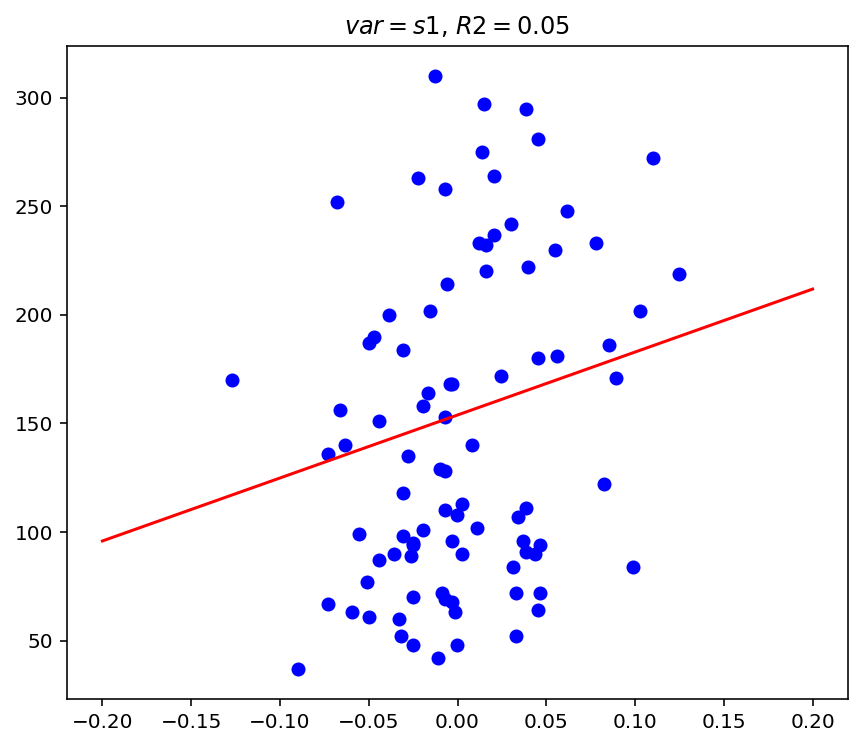

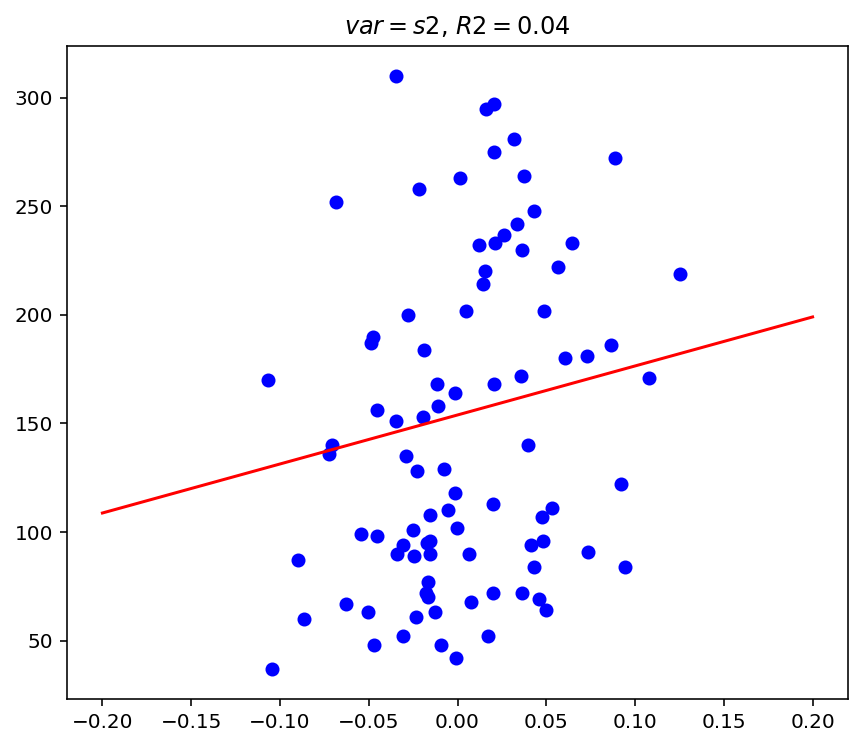

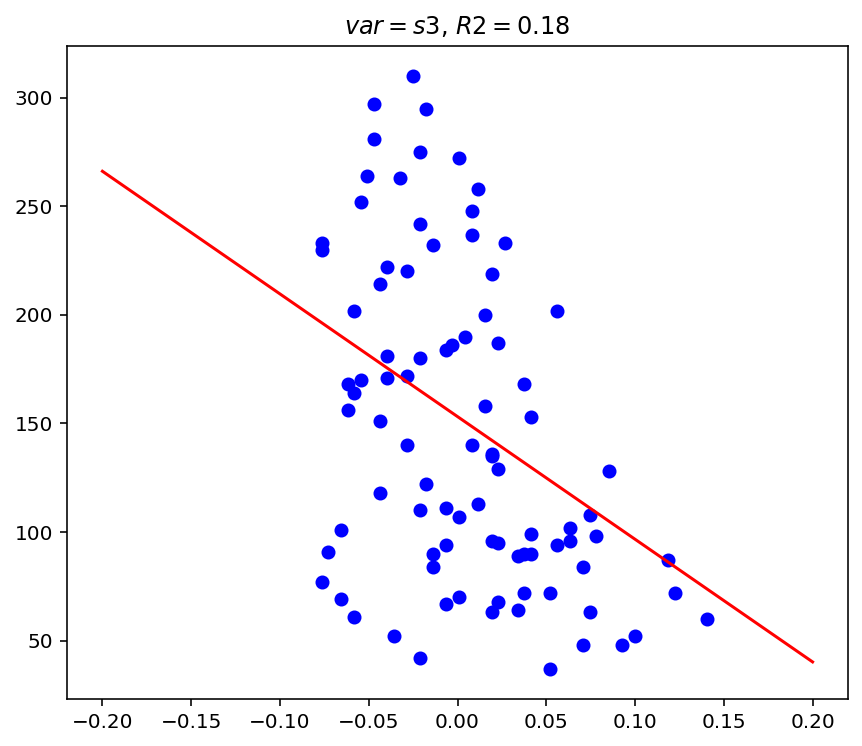

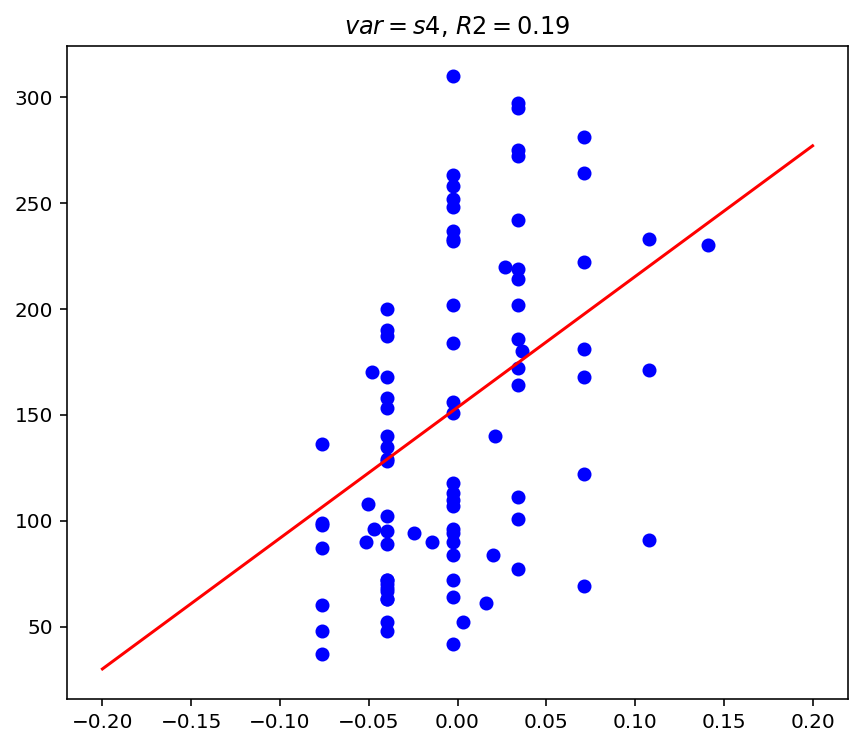

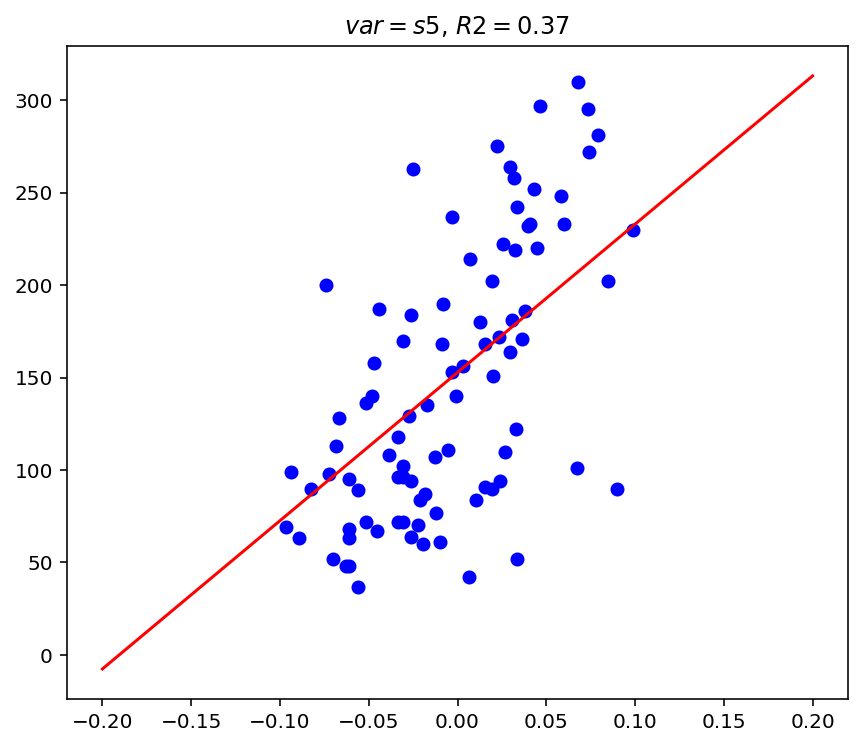

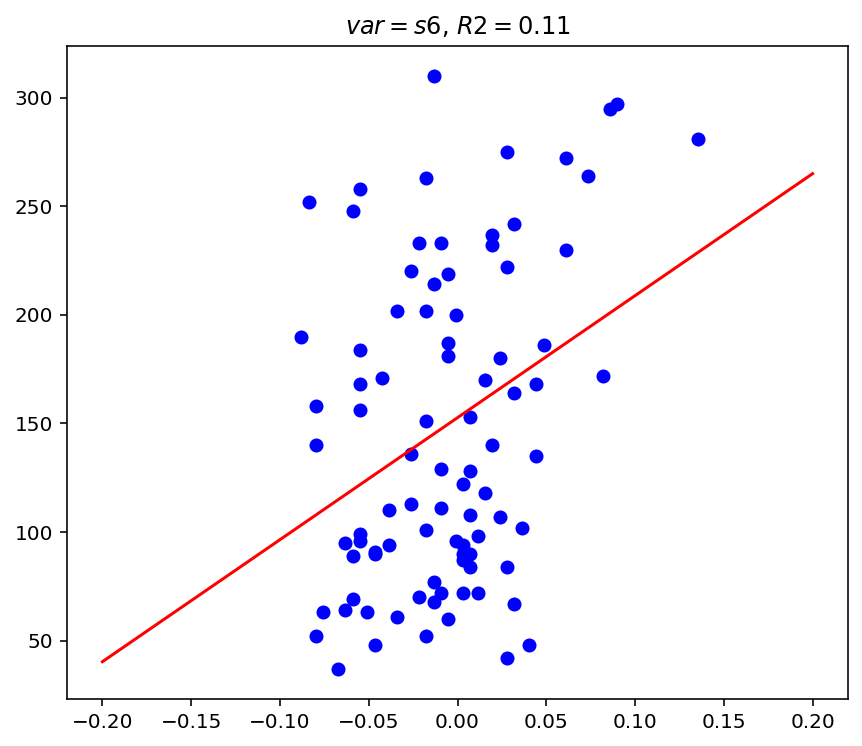

In [ ]:
from sklearn.model_selection import GridSearchCV


lr_params = {'alpha': [0.001, 0.01, 0.1, 1]}

X_pred = np.linspace(-0.2,0.2,10)

for i in range(10):
  X_f_train = X_train[:,i]
  X_f_test = X_test[:,i]

  lr, r2_value_lr = my_grid(Ridge(), lr_params, X_f_train.reshape(-1,1), Y_train, X_f_test.reshape(-1,1), Y_test)

  lr_best_params = lr.best_params_
 
  ff,aa = plt.subplots(1,1,figsize=(7,6))
  aa.scatter(X_f_test.reshape(-1,1), Y_test, marker = 'o', color='blue')
  aa.set_title(feature_names[i])
  aa.set_title('$var={0:.5s}$, $R2={1:.2f}$'.format(feature_names[i], r2_value_lr))

  Y_pred = lr.best_estimator_.predict(X_pred.reshape(-1,1))
  aa.plot(X_pred.reshape(-1,1), Y_pred, color='red')




### 2.1.2. Univariate Feature Selection with no linear regression 

Repeat the 1D analysis with Kernel ridge using a RBF kernel. Now, besides `alpha`, cross validate `gamma` using these ranges:
  - `alpha`: 0.001, 0.01, 0.1, 1
  - `gamma` for the RBF kernel: 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1


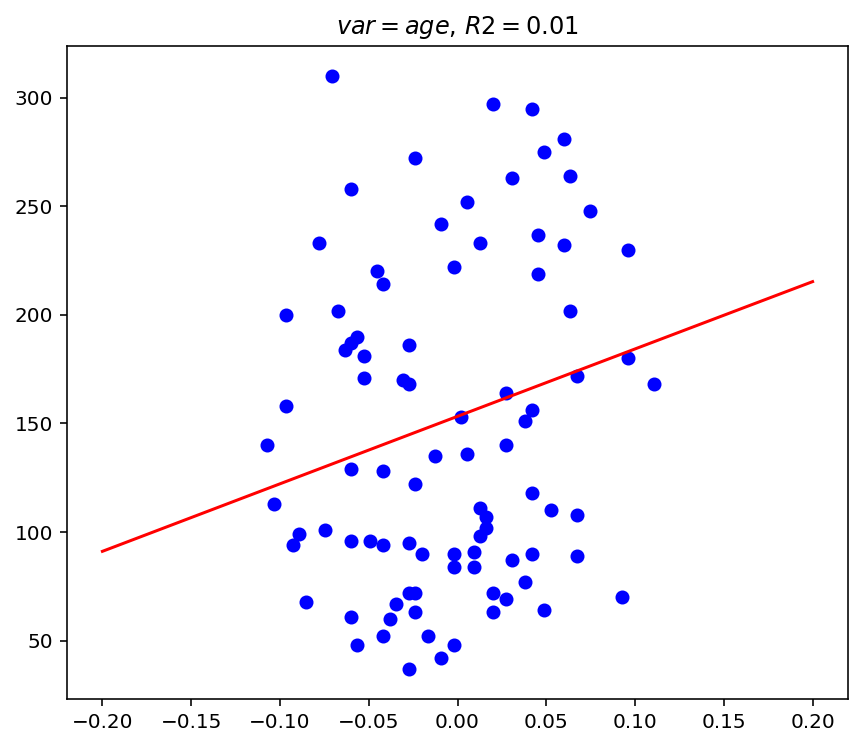

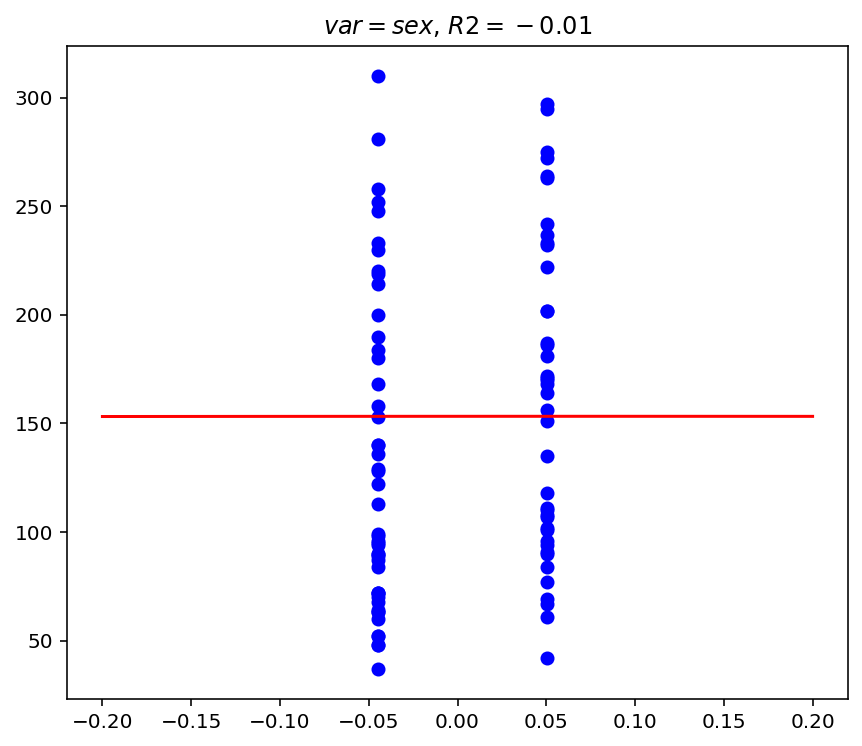

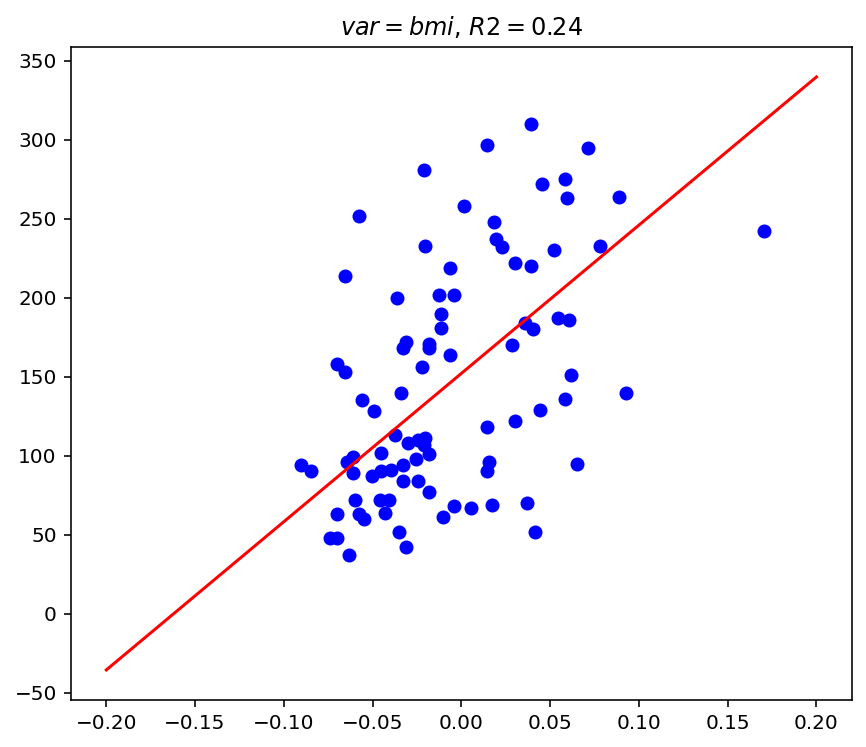

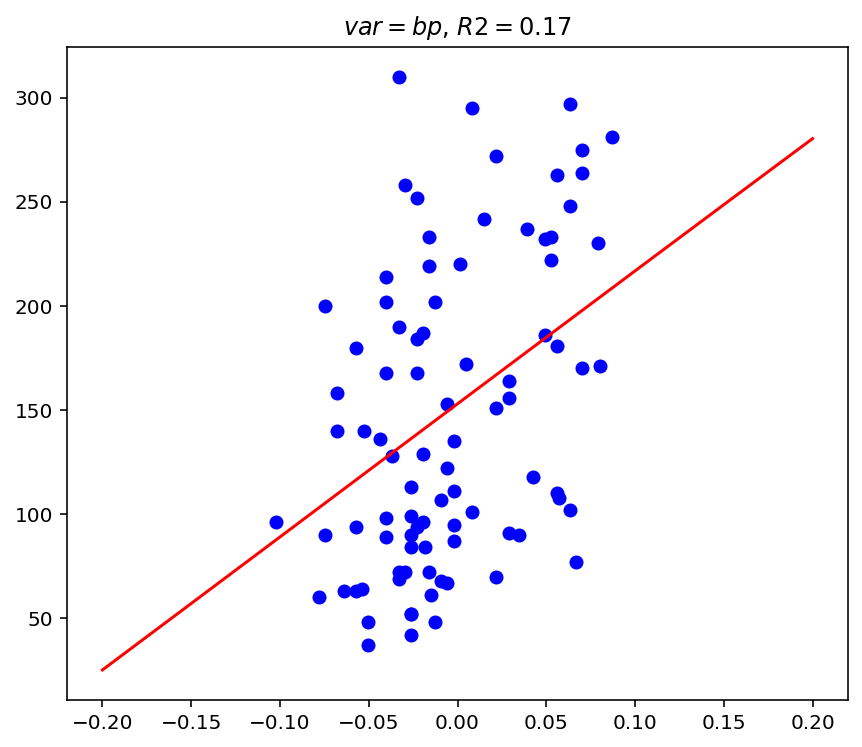

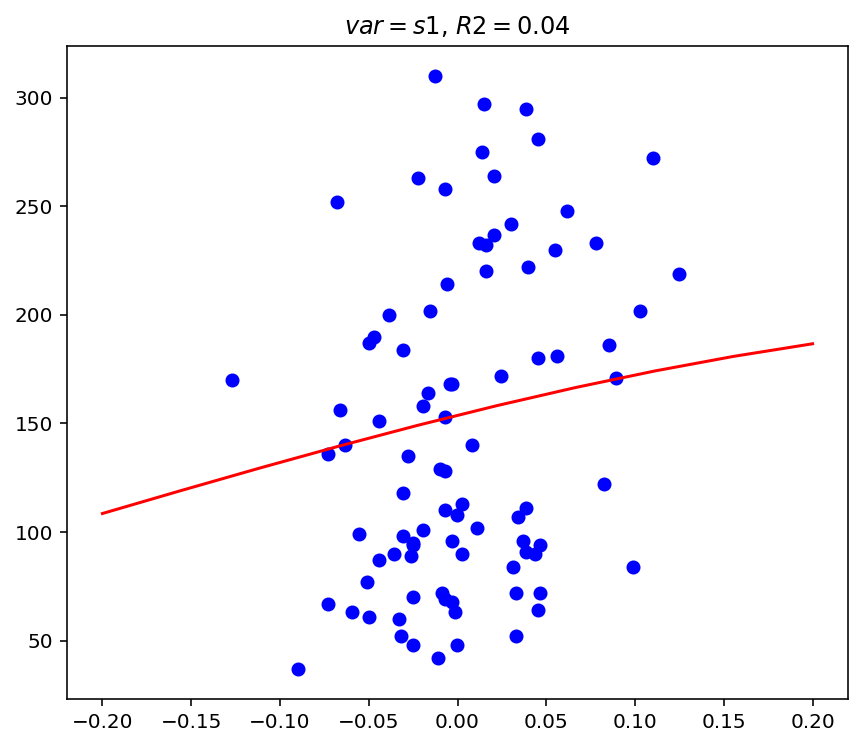

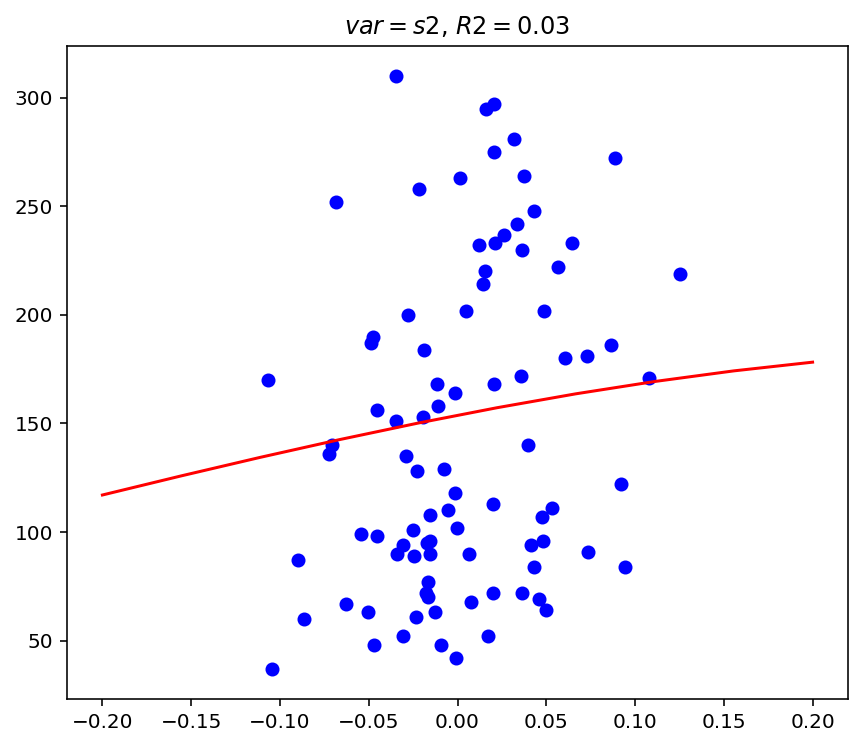

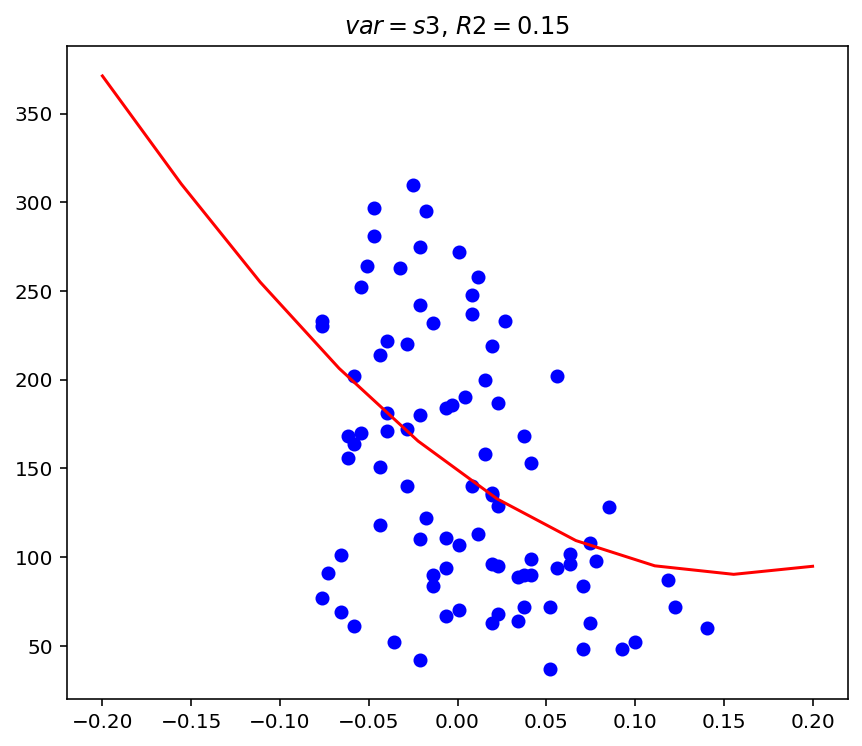

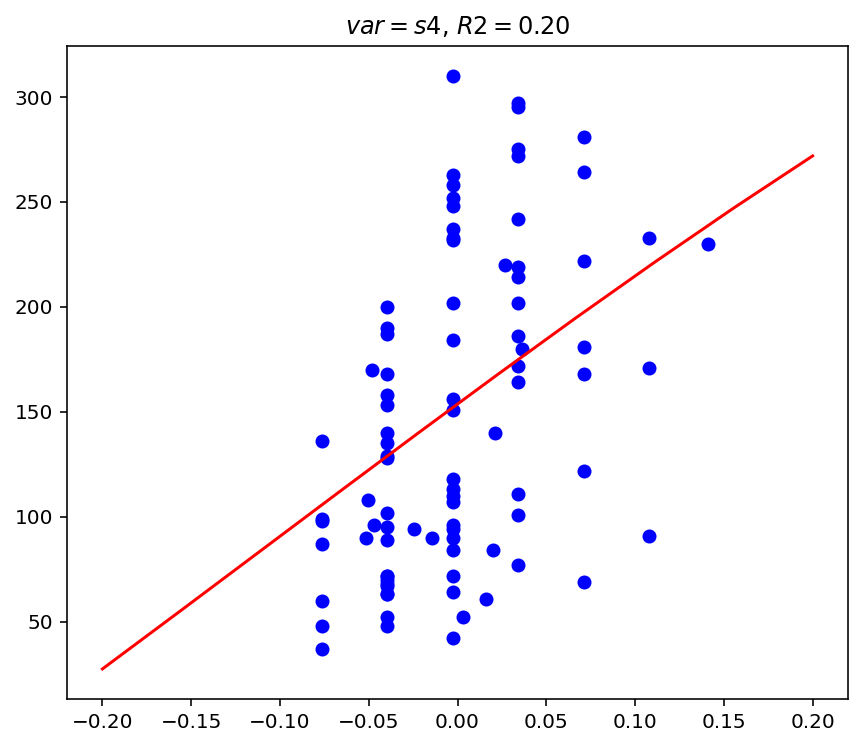

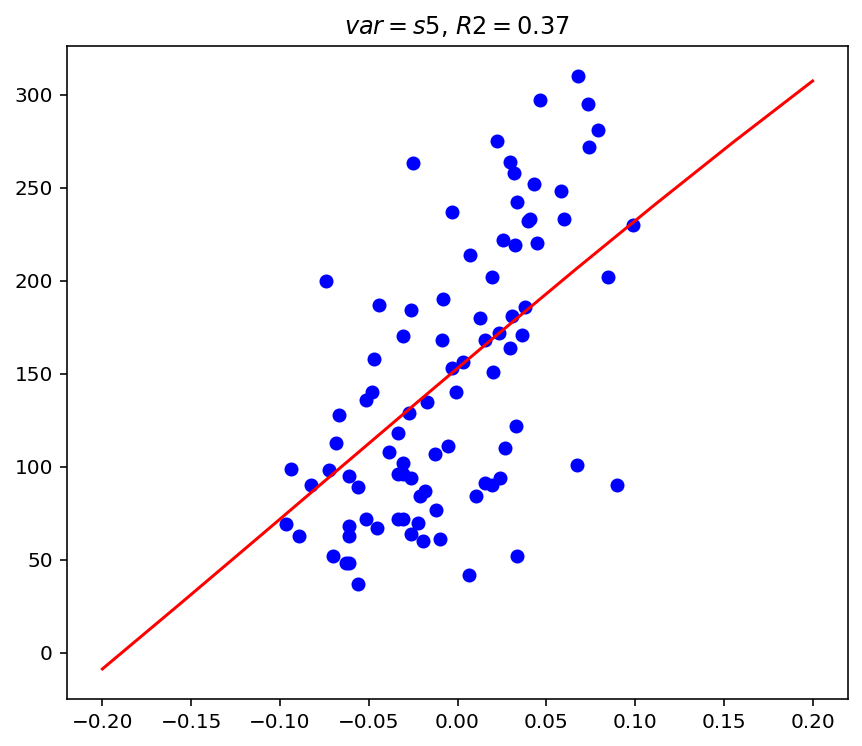

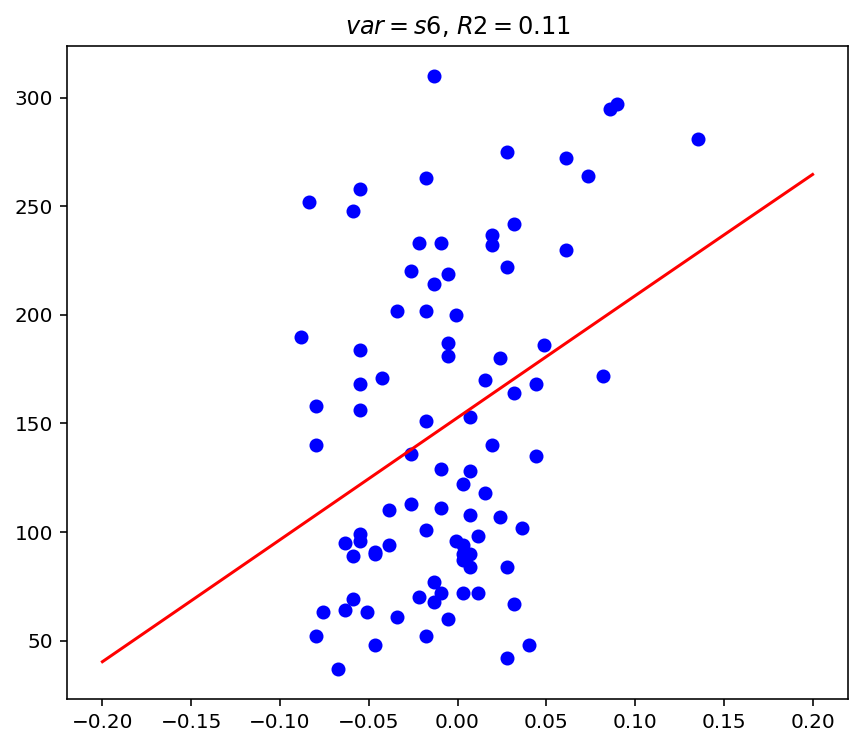

In [ ]:
kr_rbf_params = {'alpha': [0.001, 0.01, 0.1, 1], 'kernel':['rbf'],'gamma': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]}

X_pred = np.linspace(-0.2, 0.2, 10)

for i in range(10):
  X_f_train = X_train[:,i]
  X_f_test = X_test[:,i]

  kr_rbf, r2_value_kr_rbf = my_grid(KernelRidge(), kr_rbf_params, X_f_train.reshape(-1,1), Y_train, X_f_test.reshape(-1,1), Y_test)

  kr_rbf_best_params = kr_rbf.best_params_

  ff,aa = plt.subplots(1,1,figsize=(7,6))
  
  aa.scatter(X_f_test.reshape(-1,1), Y_test, marker = 'o', color='blue')
  aa.set_title(feature_names[i])
  aa.set_title('$var={0:.5s}$, $R2={1:.2f}$'.format(feature_names[i], r2_value_kr_rbf))

  Y_pred = kr_rbf.best_estimator_.predict(X_pred.reshape(-1,1))
  aa.plot(X_pred.reshape(-1,1), Y_pred, color='red')





### 2.1.3 Discussion

Was it worth to add the nonlinearity? Is there any variable for which the nonlinear model improves the linear one?

*Añadir la no linealidad ha merecido la pena ya que mejora el resultado como, por ejemplo, en la variable s3.*

## 2.2. Multivariate Feature Selection: Recursive Feature Selection

After selecting reasonable values for the hyperparameters, you are going to focus on the main goal of this study: Learn which are the most relevant variables to predict the targets.

[Recursive Feature Elimination](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html) is a commonly used framework for this purpose. It basically consists in starting with an estimator fitted with all the variables and recursively withdraw from the training set that variable that achieves a smallest relevance score. In linear regression this score is the absolute value of the weight of that variable in the regressor.

However, a major limitation of the RFE implementation of sklearn is that it only works with those estimators that implement a method to assess the relevance of the variables. 

In this section you are going to code up a version of RFE that uses the crossvalidation error to decide which variable will be removed at each iteration.

The skeleton of the code of the function is the following:

1. Loop that runs $d-1$ times, where $d$ is the number of variables (notice if at each iteration one variable is removed after $d-1$ iterations you only have one surviving variable)

    1.1. Within the $i$-th iteration of the main loop (it means you have removed $i$ variables, therefore there remain $d-i$ variables to explore). Create a `r2_score` empty array with `d-i` positions. Then run another loop for $j=1,\dots, d-i$ iterations:

      1.1.1 Make a copy of your training data and remove one of the remaining $d-i$ features. Name `Z` the $N\times (d-i-1)$ resulting data matrix. If this is the $j$-th iteration of this inner loop, let's consider `Z` results from removing column $j$ of the data matrix (that now has only $d-i$ columns). Assume the $j$ column corresponds to the original variable $v_j$ ($v_j$ is the actual position of column $j$ in the original data matrix $X$ with 10 columns).

      1.1.2. Run a crossvalidation with `Z` and `Y`. Annotate the mean score of the crossvalidation in the $j$-th position of `r2_score`. This is your estimation of the performance when you drop variable $v_j$ (after having droppped the $i$ columns you have already dropped in the previous iterations)

  1.2 Use `r2_score` to decide which is the variable you are dropping in the $i$-th iteration of the main loop. Will it be the position of the maximum or of the minimum in `r2_score`?

  1.3 Drop the corresponding column of the data matrix, now your data matrix has $d-i-1$ columns.


### 2.2.1 Program the grid exploration

Before programming the RFE alogrithm, let us redesign the code of the Section 1.1.1. Now, this function has to cross validate the model parameters, obtain its $R^2$ score over the test data but, additionaly, it has to obtain the average  cross-validated  $R^2$ score of the model for the selected parameters. Check the content of the atributte `best_score_` after fitting the GridSearch object.


In [ ]:
def my_grid(model, parameters, X_train, Y_train, X_test, Y_test):
  

  grid = GridSearchCV(model, parameters, cv=10)
  grid.fit(X_train, Y_train) #ajustamos los datos
  r2_value_CV = grid.best_score_ 
  r2_value_test =grid.score(X_test, Y_test)

  return grid, r2_value_CV, r2_value_test


### 2.2.1 Program the RFE algorithm

In [ ]:
def mi_RFE(model, params, X_train, Y_train, X_test, Y_test):
 
  N_train, D = X_train.shape
  N_test, _ = X_test.shape
  remaining_vars = [cc for cc in range(D)]
  removed_vars = []
  tst_score_after_removal = []

  for i in range(D-1):
    r2_scores_CV = []
    r2_scores_test = []

    for j, var in enumerate(remaining_vars):

      Z_train = X_train[:, np.delete(remaining_vars,j)].reshape(N_train, -1)
      Z_test = X_test[:,np.delete(remaining_vars,j)].reshape(N_test, -1)
      grid, r2_CV, r2_test = my_grid(model, params, Z_train, Y_train, Z_test, Y_test)
      r2_scores_CV.append(r2_CV)
      r2_scores_test.append(r2_test)

    worst_var_idx = np.argmax(r2_scores_CV)
    worst_var = remaining_vars[worst_var_idx]
    remaining_vars.remove(worst_var)
    removed_vars.append(worst_var)
    tst_score_after_removal.append(r2_scores_test[worst_var_idx]) #guardamos el error de test
  removed_vars.append(remaining_vars[0])
                                                 
  return removed_vars, tst_score_after_removal #devuelve .. y el error de test



Use the function above to obtain the ranking in which the variables would be removed by the following methods:
- k-NN
- Random Forest
- Ridge Regression
- Kernel Ridge Regression

using the same parameter ranges of Section 1. For the Random Forest algorithm (to speed up the CV process) you can fix the number of trees (`n_estimators`) to 100 and only cross validate `max_leaf_nodes`. Be patient running this code...

In [ ]:

print('K-NN')
variables_eliminadas_knn, v_best_scores_knn = mi_RFE(KNeighborsRegressor(), knn_params, X_train, Y_train, X_test, Y_test)
for ii,ss in enumerate(v_best_scores_knn):

  vv = variables_eliminadas_knn[ii]
  print("Iteration {0:d} remove {1}, R2 score {2:2f}".format(ii+1, feature_names[vv], v_best_scores_knn[ii]))
print("Survivor is {0}".format(feature_names[variables_eliminadas_knn[-1]]))
print("")

print('Random Forest')
rf_params2 = {'n_estimators': [100], 'max_leaf_nodes' : [5,10,20,50]}
variables_eliminadas_rf, v_best_scores_rf = mi_RFE(RandomForestRegressor(), rf_params2, X_train, Y_train, X_test, Y_test)
for ii,ss in enumerate(v_best_scores_rf):

  vv = variables_eliminadas_rf[ii]
  print("Iteration {0:d} remove {1}, R2 score {2:2f}".format(ii+1, feature_names[vv], v_best_scores_rf[ii]))
print("Survivor is {0}".format(feature_names[variables_eliminadas_rf[-1]]))
print("")

print('Ridge Regression')
variables_eliminadas_ridge, v_best_scores_ridge = mi_RFE(Ridge(), ridge_params, X_train, Y_train, X_test, Y_test)
for ii,ss in enumerate(v_best_scores_ridge):

  vv = variables_eliminadas_ridge[ii]
  print("Iteration {0:d} remove {1}, R2 score {2:2f}".format(ii+1, feature_names[vv], v_best_scores_ridge[ii]))
print("Survivor is {0}".format(feature_names[variables_eliminadas_ridge[-1]]))
print("")

print('Kernel Ridge Regression')
variables_eliminadas_kr, v_best_scores_kr = mi_RFE(KernelRidge(), kr_params, X_train, Y_train, X_test, Y_test)
for ii,ss in enumerate(v_best_scores_kr):

  vv = variables_eliminadas_kr[ii]
  print("Iteration {0:d} remove {1}, R2 score {2:2f}".format(ii+1, feature_names[vv], v_best_scores_kr[ii]))
print("Survivor is {0}".format(feature_names[variables_eliminadas_kr[-1]]))

K-NN
Iteration 1 remove s6, R2 score 0.440215
Iteration 2 remove s4, R2 score 0.451027
Iteration 3 remove s1, R2 score 0.458003
Iteration 4 remove sex, R2 score 0.441319
Iteration 5 remove s3, R2 score 0.426350
Iteration 6 remove bp, R2 score 0.435186
Iteration 7 remove s2, R2 score 0.481889
Iteration 8 remove age, R2 score 0.464598
Iteration 9 remove s5, R2 score 0.227914
Survivor is bmi

Random Forest
Iteration 1 remove s4, R2 score 0.489362
Iteration 2 remove s3, R2 score 0.456314
Iteration 3 remove s2, R2 score 0.460559
Iteration 4 remove bp, R2 score 0.447723
Iteration 5 remove s6, R2 score 0.438965
Iteration 6 remove sex, R2 score 0.444085
Iteration 7 remove age, R2 score 0.455181
Iteration 8 remove s1, R2 score 0.469160
Iteration 9 remove s5, R2 score 0.222134
Survivor is bmi

Ridge Regression
Iteration 1 remove age, R2 score 0.467317
Iteration 2 remove s4, R2 score 0.471464
Iteration 3 remove s6, R2 score 0.469029
Iteration 4 remove s2, R2 score 0.469159
Iteration 5 remove s1, 

**Compare the 4 rankings**

En todos los rankings, la variable superviviente es "bmi".

Al terminar las iteraciones, el que se queda con mejor score es Ridge Regression, a diferencia de antes de quitar las variables que el mejor score era el de Random Forest.



Looking at the rankings of the removed variables and the validation scores that the different methods achieve once these variables have been removed, categorize the 10 variables in these three groups:

- **Essential variables**: When one of these variables is removed the performance starts to worsen significantly.
- **Noisy variables**: Removing these variables makes the performance better
- **Redundant variables**: These variables can be removed without affecting the performance, as with high probability the information that they carry is also present in other variables.

**Justify your answer**

*Vemos que en todos los métodos si quitamos la variable "s5" baja mucho el score, por lo que es una variable importante.*

*Sin embargo, por ejemplo, si quitamos la variable "sex" podemos comprobar que sube el score, por lo que pertenecerá a las variables de ruido (excepto en Random Forest).*

*Por último, vemos que si por ejemplo quitamos la variable "s2" en Kernel Ridge, no cambia apenas el score, por lo que pertenecerá a variables redundantes.*

# 3. Role of each variable in the model

Besides the importance of each variable in the prediction of the targets evaluated in Section 2, some of the models enable to analize the role of each variable within the predictive function $f(\mathbf x)$.



## 3.1. Linear regression case
In the linear regression case
$$
f(\mathbf x) = \mathbf w^\top \mathbf x + w_0 = w_0 + \sum_{k=1}^d w_kx_k
$$each variable $x_k$ contribution to the predictive function is its value multiplied by the weight $w_k$.

**Relate the value of $w_k$ with the relevance of $x_k$**.

Retrieve the weights of the `best_estimator_` for the ridge regressor in Section 1.1 and compare this relevance of the variables based on these weights with the ranking of variables found in Section 2.2 (for the Ridge ression model).

Hint: Think about the sign and the absolute value of $w_k$.

In [ ]:
relevance = ridge.best_estimator_.coef_
order = np.argsort(np.absolute(relevance))

for ii in order:
  print("Variable {0}, relevance {1:.2f}".format(feature_names[ii], np.absolute(relevance[ii])))

#Cuando un peso es negativo (-w), tenemos correlación negativa. 
#Ejemplo: si comemos muchas verduras, más baja es la diabetes 
#el peso más grande EN VALOR ABSOLUTO va a ser el más importante, pesos que se acerquen a 0 van a ser menos importantes

Variable age, relevance 42.85
Variable s6, relevance 79.91
Variable s2, relevance 86.24
Variable s1, relevance 108.50
Variable s4, relevance 151.71
Variable s3, relevance 190.37
Variable sex, relevance 205.50
Variable bp, relevance 317.10
Variable s5, relevance 392.29
Variable bmi, relevance 505.09


**Include your discussion here!**

*El peso más relevante es "bmi" y el menos relevante es "age" en Linear Regression.*

## 3.2 Decision Tree

Plot a decision tree with the code of the lecture notebook and interpret the relevance of the variables. 

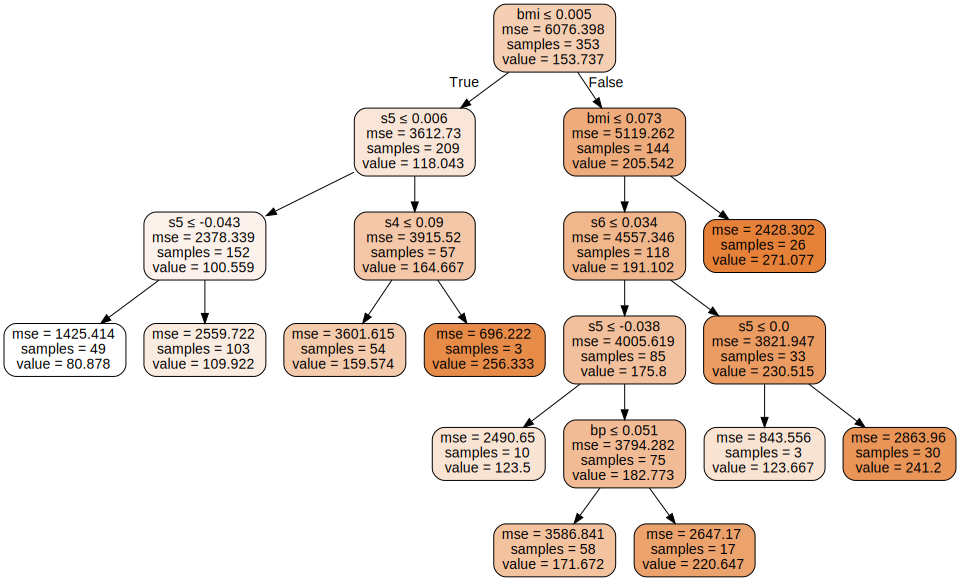

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import graphviz

dt = DecisionTreeRegressor(max_leaf_nodes=10)
dt.fit(X_train, Y_train)
dot_Data = tree.export_graphviz(dt, 
                                out_file=None, 
                                feature_names = feature_names,
                                filled=True, 
                                rounded=True,  
                              special_characters=True)
graph = graphviz.Source(dot_Data)
graph


**Include your discussion here!**

*El término más relevante es "bmi" y el menos relevante es "s5" para Decision Tree.*

## 3.3. Random Forest

In Random Forest the variables are individually selected to design the stump test in each branch node of each tree in the forest. Relevant variables will be in general oftenly selected for these tests, while noisy or redundant variables will be selected less oftenly.  Besides, since the growing of each tree only considers a subset of the training data, the left-out subset can be used as validation set to evaluate the quality of each stump. In this sense, the most relevant variables will lead to better quality stumps.

In the sklearn implementation of Random Forest there is a property `feature_importances_` that is precisely a score in the relevance of the features.

**Retrieve the weights of the `best_estimator_` for the random forest in Section 1.1 and compare this relevance score  with the ranking of variables found in Section 2.2.**

In [ ]:
relevance = rf.best_estimator_.feature_importances_
order = np.argsort(relevance)

for ii in order:
  print("Variable {0}, relevance {1:.2f}".format(feature_names[ii], relevance[ii]))


Variable sex, relevance 0.00
Variable s4, relevance 0.01
Variable s1, relevance 0.02
Variable age, relevance 0.02
Variable s2, relevance 0.03
Variable s3, relevance 0.03
Variable s6, relevance 0.04
Variable bp, relevance 0.07
Variable s5, relevance 0.33
Variable bmi, relevance 0.45


**Include your discussion here!**

*La variable más relevante es "bmi" y la menos relevante es "sex" en Random Forest.*